## 1. Importação de bibliotecas e leitura do arquivo

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [9]:
df = pd.read_csv('data\Coffe_sales.csv')
df.sample(5)

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
3534,12,card,25.96,Americano,Afternoon,Sat,Mar,6,3,2025-03-22,12:25:59.676000
3129,10,card,35.76,Hot Chocolate,Morning,Sat,Feb,6,2,2025-02-22,10:52:18.682000
495,19,card,37.72,Cappuccino,Night,Thu,May,4,5,2024-05-23,19:17:28.431000
412,13,card,27.92,Americano,Afternoon,Wed,May,3,5,2024-05-15,13:34:35.102000
670,21,card,32.82,Americano with Milk,Night,Tue,Jun,2,6,2024-06-11,21:27:41.900000


## 2. Limpeza e tratamento dos dados

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   Time_of_Day  3547 non-null   object 
 5   Weekday      3547 non-null   object 
 6   Month_name   3547 non-null   object 
 7   Weekdaysort  3547 non-null   int64  
 8   Monthsort    3547 non-null   int64  
 9   Date         3547 non-null   object 
 10  Time         3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB


In [11]:
df.isnull().sum()

hour_of_day    0
cash_type      0
money          0
coffee_name    0
Time_of_Day    0
Weekday        0
Month_name     0
Weekdaysort    0
Monthsort      0
Date           0
Time           0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df['Time'] = pd.to_timedelta(df['Time'])

In [14]:
df.dtypes

hour_of_day              int64
cash_type               object
money                  float64
coffee_name             object
Time_of_Day             object
Weekday                 object
Month_name              object
Weekdaysort              int64
Monthsort                int64
Date            datetime64[ns]
Time           timedelta64[ns]
dtype: object

## 3. Análise Exploratória (EDA)

In [15]:
df.describe().round(2)

,hour_of_day,money,Weekdaysort,Monthsort,Date,Time
count,3547.00,3547.00,3547.00,3547.00,3547,3547
mean,14.19,31.65,3.85,6.45,2024-10-04 17:34:43.676346368,0 days 14:40:36.033833662
min,6.00,18.12,1.00,1.00,2024-03-01 00:00:00,0 days 06:50:04.455000
25%,10.00,27.92,2.00,3.00,2024-07-17 12:00:00,0 days 10:57:06.298000
50%,14.00,32.82,4.00,7.00,2024-10-10 00:00:00,0 days 14:31:28.741000
75%,18.00,35.76,6.00,10.00,2025-01-11 00:00:00,0 days 18:11:31.387500
max,22.00,38.70,7.00,12.00,2025-03-23 00:00:00,0 days 22:59:18.544000
std,4.23,4.88,1.97,3.50,NaN,0 days 04:13:10.422522497


In [16]:
paleta = sns.color_palette("dark:salmon_r")
paleta

[(0.9803921568627451, 0.5019607843137255, 0.4470588235294118),
 (0.8206223693544625, 0.42905134566038194, 0.3844558865578708),
 (0.66085258184618, 0.3561419070070384, 0.3218529495863298),
 (0.5010827943378976, 0.28323246835369487, 0.25925001261478886),
 (0.34131300682961496, 0.21032302970035127, 0.19664707564324785),
 (0.18154321932133258, 0.13741359104700773, 0.13404413867170692)]

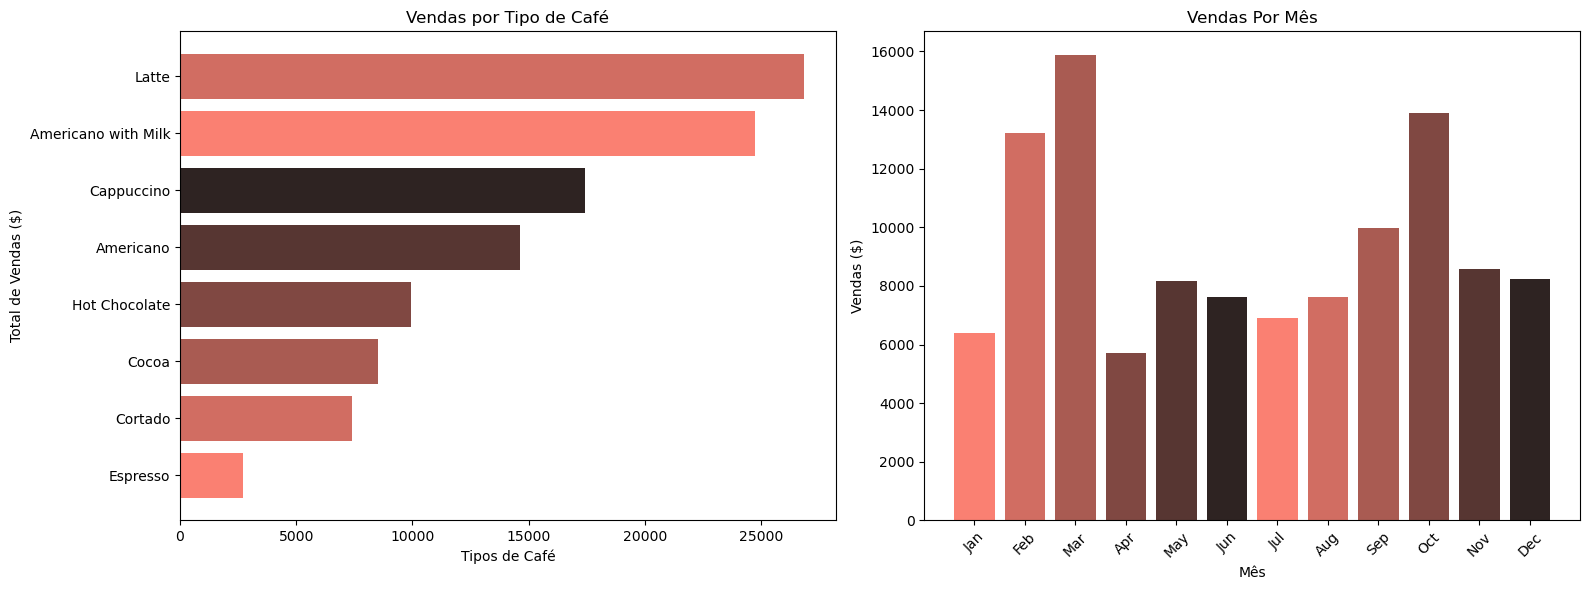

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Primeiro gráfico - Vendas por Tipo de Café
coffee_money = df.groupby('coffee_name')['money'].sum().sort_values(ascending=True)
ax1.barh(coffee_money.index, coffee_money.values, color=paleta)
ax1.set_xlabel('Tipos de Café')
ax1.set_ylabel('Total de Vendas ($)')
ax1.set_title('Vendas por Tipo de Café')
ax1.tick_params(axis='x')

# Segundo gráfico - Vendas por Mês
ordem_meses = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
mes_money = df.groupby('Month_name')['money'].sum()
mes_money = mes_money.reindex(ordem_meses)

ax2.bar(mes_money.index, mes_money.values, color=paleta)
ax2.set_xlabel('Mês')
ax2.set_ylabel('Vendas ($)')
ax2.set_title('Vendas Por Mês')
ax2.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

Com base nos gráficos acima, podemos concluir que os três cafés mais vendidos são o **Latte**, o **Americano with Milk** e o **Cappuccino**. Além disso, o mês com a maior receita foi março, seguido por outubro e fevereiro.

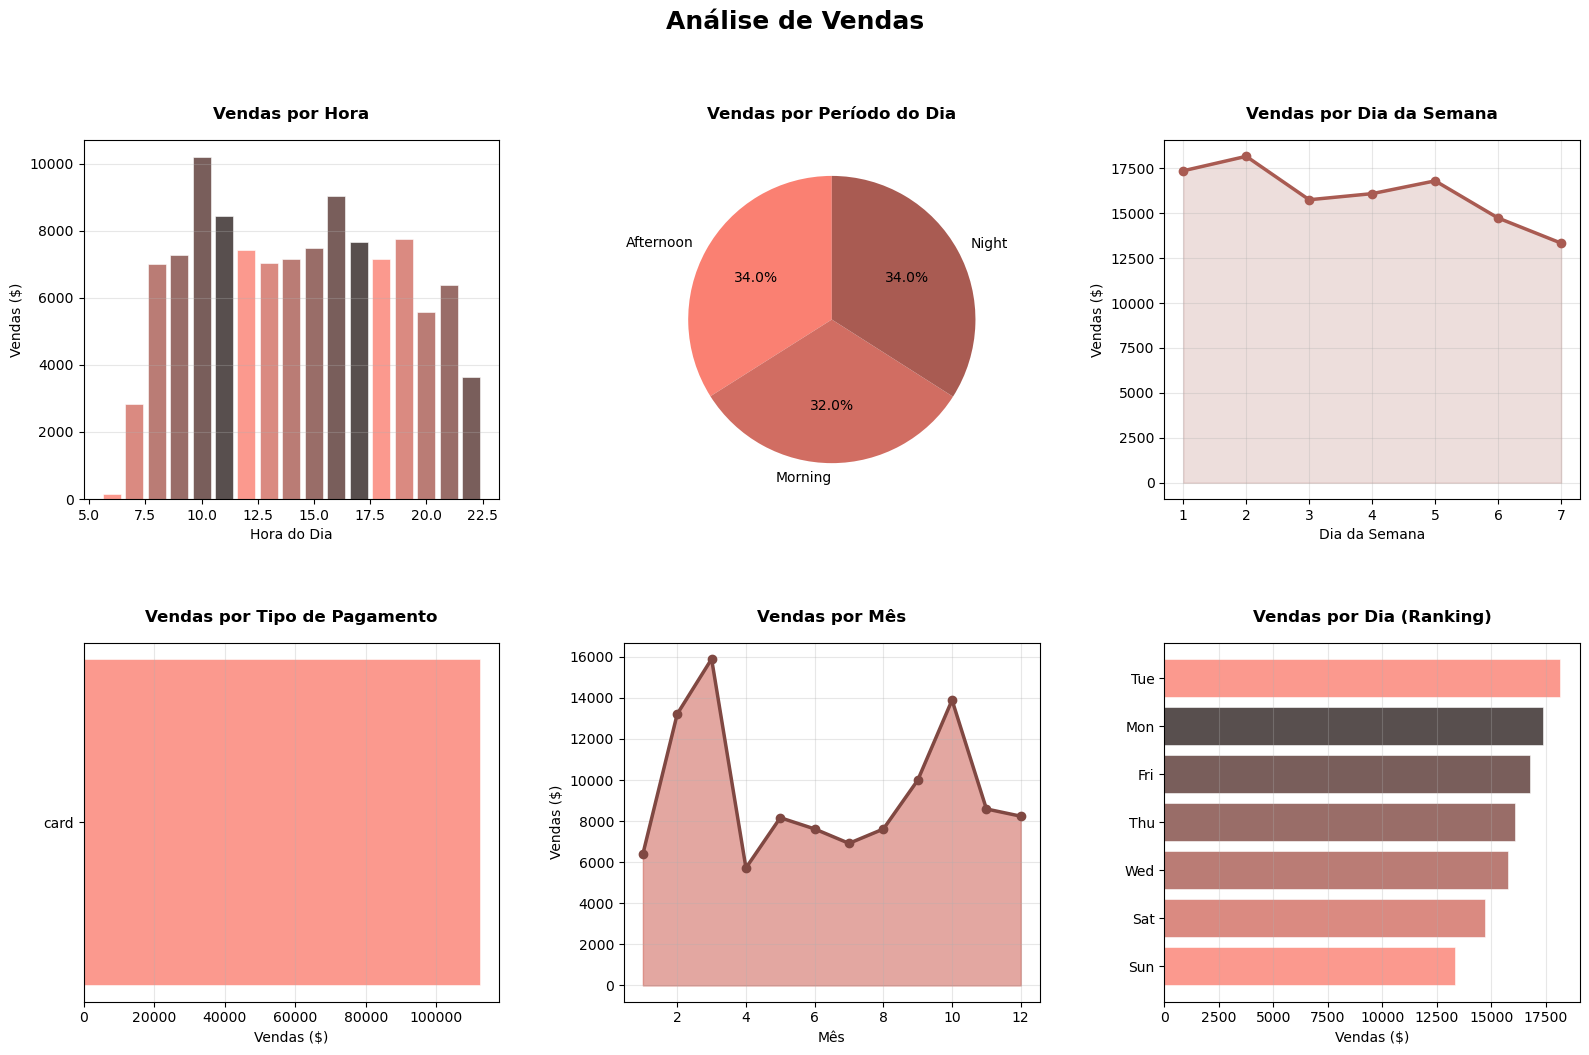

In [18]:
data_aggregations = {
    'Hora': df.groupby('hour_of_day')['money'].sum(),
    'Dia Semana': df.groupby('Weekday')['money'].sum(),
    'Dia Ordenado': df.groupby('Weekdaysort')['money'].sum(),
    'Pagamento': df.groupby('cash_type')['money'].sum(),
    'Mês': df.groupby('Monthsort')['money'].sum(),
    'Período Dia': df.groupby('Time_of_Day')['money'].sum()
}

# Criar figura com subplots
fig, axs = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Análise de Vendas', fontsize=18, fontweight='bold', y=1.05)

# Configurações comuns
bar_config = {'alpha': 0.8, 'edgecolor': 'white', 'linewidth': 0.5}
line_config = {'linewidth': 2.5, 'marker': 'o', 'markersize': 6}

# 1. Vendas por Hora do Dia (Barras)
axs[0, 0].bar(data_aggregations['Hora'].index, data_aggregations['Hora'].values, 
               color=paleta, **bar_config)
axs[0, 0].set_title('Vendas por Hora', fontweight='bold', pad=15)
axs[0, 0].set_xlabel('Hora do Dia')
axs[0, 0].set_ylabel('Vendas ($)')
axs[0, 0].grid(axis='y', alpha=0.3)

# 2. Vendas por Período do Dia (Pizza)
axs[0, 1].pie(data_aggregations['Período Dia'].values, 
               labels=data_aggregations['Período Dia'].index, 
               autopct='%1.1f%%', colors=paleta, startangle=90)
axs[0, 1].set_title('Vendas por Período do Dia', fontweight='bold', pad=15)

# 3. Vendas por Dia da Semana (Linha)
axs[0, 2].plot(data_aggregations['Dia Ordenado'].index, 
               data_aggregations['Dia Ordenado'].values, 
               color=paleta[2], **line_config)
axs[0, 2].fill_between(data_aggregations['Dia Ordenado'].index,
                       data_aggregations['Dia Ordenado'].values,
                       alpha=0.2, color=paleta[2])
axs[0, 2].set_title('Vendas por Dia da Semana', fontweight='bold', pad=15)
axs[0, 2].set_xlabel('Dia da Semana')
axs[0, 2].set_ylabel('Vendas ($)')
axs[0, 2].grid(True, alpha=0.3)

# 4. Vendas por Tipo de Pagamento (Barras Horizontais)
axs[1, 0].barh(list(data_aggregations['Pagamento'].index), 
               data_aggregations['Pagamento'].values, 
               color=paleta, **bar_config)
axs[1, 0].set_title('Vendas por Tipo de Pagamento', fontweight='bold', pad=15)
axs[1, 0].set_xlabel('Vendas ($)')
axs[1, 0].grid(axis='x', alpha=0.3)

# 5. Vendas por Mês (Área)
axs[1, 1].fill_between(data_aggregations['Mês'].index,
                       data_aggregations['Mês'].values,
                       alpha=0.6, color=paleta[1])
axs[1, 1].plot(data_aggregations['Mês'].index,
               data_aggregations['Mês'].values,
               color=paleta[3], **line_config)
axs[1, 1].set_title('Vendas por Mês', fontweight='bold', pad=15)
axs[1, 1].set_xlabel('Mês')
axs[1, 1].set_ylabel('Vendas ($)')
axs[1, 1].grid(True, alpha=0.3)

# 6. Top Produtos/Vendas (Barras Horizontais - Dia da Semana)
weekday_sorted = data_aggregations['Dia Semana'].sort_values(ascending=True)
axs[1, 2].barh(weekday_sorted.index, weekday_sorted.values, 
               color=paleta, **bar_config)
axs[1, 2].set_title('Vendas por Dia (Ranking)', fontweight='bold', pad=15)
axs[1, 2].set_xlabel('Vendas ($)')
axs[1, 2].grid(axis='x', alpha=0.3)

# Ajustar layout
plt.tight_layout()
plt.subplots_adjust(top=0.92, hspace=0.4, wspace=0.3)
plt.show()

Com base na análise integrada dos seis gráficos, identificam-se os seguintes padrões de consumo:

**Horários e Turnos**: O período da manhã concentra o maior volume de vendas, com pico por volta das 10h, enquanto a distribuição por turnos mostra que a tarde (Afternoon) lidera com 34% do total, seguida pela manhã (34%) e noite (32%).

**Dias da Semana**: Os dias iniciais (segunda a quarta-feira) apresentam as maiores receitas, com destaque para a terça-feira como o dia de maior movimento.

**Pagamento**: O cartão é a forma de pagamento predominante, representando a grande maioria das transações.

**Sazonalidade**: O mês de março apresenta o pico de vendas, seguido por outubro, indicando maior movimento nesses períodos.

Esses padrões revelam um perfil de consumidor que prefere pagamentos digitais, concentra suas compras no início da semana e em meses específicos, e mantém um consumo expressivo tanto no turno da manhã quanto da tarde.

In [19]:
custom_cmap = LinearSegmentedColormap.from_list('custom_palette', paleta, N=256)

# tabela com preços dos cafés
coffee_prices = df.groupby('coffee_name')['money'].agg(['sum', 'mean', 'count']).round(2)
coffee_prices = coffee_prices.rename(columns={
    'sum': 'Total Vendido ($)',
    'mean': 'Preço Médio ($)',
    'count': 'Quantidade Vendida'
}).sort_values('Total Vendido ($)', ascending=False)

styled_table = coffee_prices.style.format({
    'Total Vendido ($)': '${:,.2f}',
    'Preço Médio ($)': '${:.2f}',
    'Quantidade Vendida': '{:,}'
}).background_gradient(cmap=custom_cmap, subset=['Total Vendido ($)'])\
  .background_gradient(cmap=custom_cmap, subset=['Preço Médio ($)'])\
  .background_gradient(cmap=custom_cmap, subset=['Quantidade Vendida'])

styled_table

,Total Vendido ($),Preço Médio ($),Quantidade Vendida
coffee_name,,,
Latte,"$26,875.30",$35.50,757
Americano with Milk,"$24,751.12",$30.59,809
Cappuccino,"$17,439.14",$35.88,486
Americano,"$14,650.26",$25.98,564
Hot Chocolate,"$9,933.46",$35.99,276
Cocoa,"$8,521.16",$35.65,239
Cortado,"$7,384.86",$25.73,287
Espresso,"$2,690.28",$20.85,129


Os dados revelam que o Latte é o carro-chefe em faturamento, gerando US$ 26.875,30, embora o Americano with Milk lidere em volume de vendas com 809 unidades.

Nota-se uma correlação interessante: as bebidas com preços mais elevados (Hot Chocolate a US$ 35,99 e Cappuccino a US$ 35,88) mantêm volumes significativos, sugerindo que a clientela valoriza qualidade e está disposta a pagar mais.

O Espresso aparece como oportunidade de crescimento, sendo o menos vendido (129 unidades) com o menor preço médio (US$ 20,85), indicando potencial para estratégias de upsell ou reposicionamento.

In [ ]:
# Exportar os dados processados para o utilização no ml
df.to_csv('coffee_sales_processed.csv', index=False)